In [1]:
import numpy as np 
import pandas as pd
from tqdm import tqdm_notebook as tqdm
import random
import os
import pickle
from sklearn import metrics
from datetime import date
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.graph_objects as go
import numpy as np
from plotly.subplots import make_subplots
import seaborn as sns
import Model_func as func
from tensorflow.keras.models import Model, Sequential, load_model

In [4]:
with open(r'D:\OneDrive - SinoPac\data\evaluate\local\evaluate_large', 'rb') as fp:
    eval_test = pickle.load(fp)

Detailed Evaluation

In [7]:
eval_test_trade = np.array([[data[i].values.tolist() for i in range(2)] for data in eval_test])
# eval_test_asset = np.array([[data[i].values.tolist() for i in range(2, 5)] for data in eval_test])
# eval_test_demo = np.array([data[5] for data in eval_test])
# information = [data[6] for data in eval_test]

In [8]:
model = load_model(r'D:\Customer_Value\model\first_stage.h5')

W0327 09:52:56.618810 15428 deprecation.py:506] From C:\Users\011553\AppData\Local\Continuum\anaconda3\envs\tf-gpu\lib\site-packages\tensorflow\python\ops\init_ops.py:97: calling GlorotUniform.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0327 09:52:56.634181 15428 deprecation.py:506] From C:\Users\011553\AppData\Local\Continuum\anaconda3\envs\tf-gpu\lib\site-packages\tensorflow\python\ops\init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0327 09:52:56.634181 15428 deprecation.py:506] From C:\Users\011553\AppData\Local\Continuum\anaconda3\envs\tf-gpu\lib\site-packages\tensorflow\pyth

In [10]:
df = func.concat_original_df([eval_test_trade, eval_test_asset, eval_test_demo], information, r'D:\OneDrive - SinoPac\data\evaluate\st_sample_all_large.csv', model)

In [11]:
fp, fn, churn, active = func.subset_df(df)

ValueError: No objects to concatenate

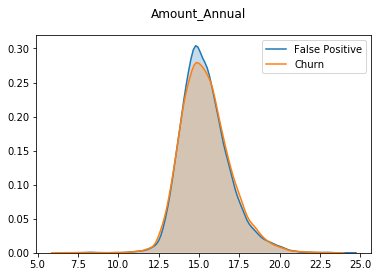

In [43]:
fig = sns.kdeplot(np.log(fp['amount_annual'].astype(np.float64)), shade=True, legend=False)
fig = sns.kdeplot(np.log(churn['amount_annual'].astype(np.float64)), shade=True, legend=False)
fig.legend(labels=['False Positive', 'Churn'])
fig.figure.suptitle("Amount_Annual", fontsize = 12)
plt.show()

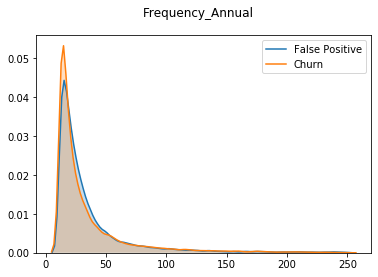

In [45]:
fig = sns.kdeplot(fp['frequency_annual'].astype(np.float64), shade=True, legend=False)
fig = sns.kdeplot(churn['frequency_annual'].astype(np.float64), shade=True, legend=False)
fig.legend(labels=['False Positive', 'Churn'])
fig.figure.suptitle("Frequency_Annual", fontsize = 12)
plt.show()

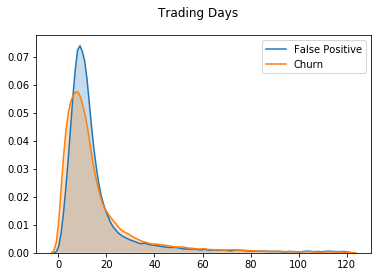

In [46]:
fig = sns.kdeplot(fp['trading_days_total_120_days'].astype(np.float64), shade=True, legend=False)
fig = sns.kdeplot(churn['trading_days_total_120_days'].astype(np.float64), shade=True, legend=False)
fig.legend(labels=['False Positive', 'Churn'])
fig.figure.suptitle("Trading Days", fontsize = 12)
plt.show()

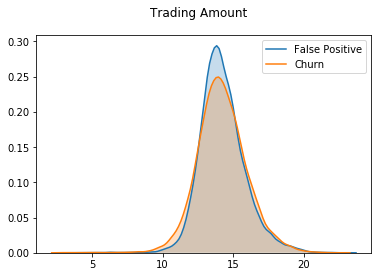

In [47]:
fig = sns.kdeplot(np.log(fp['trading_days_amount_120_days'].astype(np.float64)), shade=True, legend=False)
fig = sns.kdeplot(np.log(churn['trading_days_amount_120_days'].astype(np.float64)), shade=True, legend=False)
fig.legend(labels=['False Positive', 'Churn'])
fig.figure.suptitle("Trading Amount", fontsize = 12)
plt.show()

In [41]:
d

,AGE,AMT_B,AMT_B_label,AMT_S,AMT_S_label,BIRTH_ADDRESS,GENDER,LABEL_CHURN,LIVING_ADDRESS,MP_ASSET,...,S_IDNO,TRADE,YEAR,amount_annual,frequency_annual,sample_no,sampled,sampled_eval,trading_days_amount_120_days,trading_days_total_120_days
9,67,0,0,349400,8,桃園市大園區田心里３８鄰中園街２５號１０樓,M,ACTIVE,桃園市大園區田心里２３鄰新興路２６９巷２１號,0,...,A100002167,1,2017,NaN,18,A100002167_0,NaN,Y,1.49665e+06,14
29,69,0,0,196500,7,台北市大安區錦安里５鄰金山南路２段１５９巷１４號２樓,M,ACTIVE,新北市板橋區東門街３０之２號６樓之１,0,...,A100066714,1,2018,4.42329e+06,14,A100066714_0,NaN,Y,327520,2
33,68,26200,2,25100,2,台中市豐原區西安里２６鄰西勢路１１４巷４２弄９４號,M,ACTIVE,台中市豐原區西安里２６鄰西勢路１１４巷４２弄９４號,0,...,A100100186,1,2018,1.97663e+06,20,A100100186_0,NaN,Y,910950,12
36,67,0,0,150000,7,新北市永和區保順里３７鄰仁愛路２８２巷２２號７樓,M,ACTIVE,新北市永和區保順里３７鄰仁愛路２８２巷２２號７樓,0,...,A100100597,1,2017,7.6126e+06,30,A100100597_1,NaN,Y,3.65875e+06,17
38,67,60600,4,0,0,新北市永和區保順里３７鄰仁愛路２８２巷２２號７樓,M,ACTIVE,新北市永和區保順里３７鄰仁愛路２８２巷２２號７樓,0,...,A100100597,1,2018,7.36975e+06,38,A100100597_3,NaN,Y,1.77525e+06,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5240639,51,56000,4,0,0,新竹市香山區東香里１３鄰富群街８５巷１８弄１２號,F,CHURN,新竹市香山區東香里１３鄰富群街８５巷１８弄１２號,0,...,Z200003283,1,2018,695700,12,Z200003283_0,Y,NaN,294500,6
5240999,34,58000,4,0,0,連江縣北竿鄉塘岐村８鄰２２８號,F,CHURN,新北市中和區復興路３０１巷８號３樓,0,...,Z200079634,1,2016,1.2835e+06,16,Z200079634_0,Y,NaN,795800,10
5241599,46,0,0,1.37645e+06,10,連江縣莒光鄉青帆村４鄰８０號,F,CHURN,新北市三重區車路頭街７號９樓,0,...,Z200111477,1,2017,4.87855e+07,20,Z200111477_0,Y,NaN,9.63895e+06,6
5241239,49,0,0,243100,8,新北市中和區德穗里２１鄰莒光路１２０巷１９弄７之４號,F,CHURN,新北市中和區德穗里２１鄰莒光路１２０巷１９弄７之４號,0,...,Z200116703,1,2017,3.24663e+06,13,Z200116703_0,Y,NaN,2.91738e+06,10
